In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
red_wine = pd.read_csv("/content/drive/MyDrive/veribilimi/denemeler/wine quality/wine+quality/winequality-red.csv",sep=";")
white_wine = pd.read_csv("/content/drive/MyDrive/veribilimi/denemeler/wine quality/wine+quality/winequality-white.csv",sep=";")

# K-Means Cluster

Red Wine

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

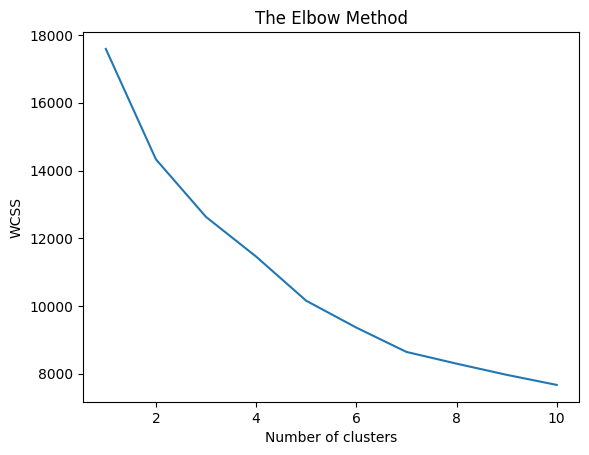

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    1009
0     590
Name: count, dtype: int64


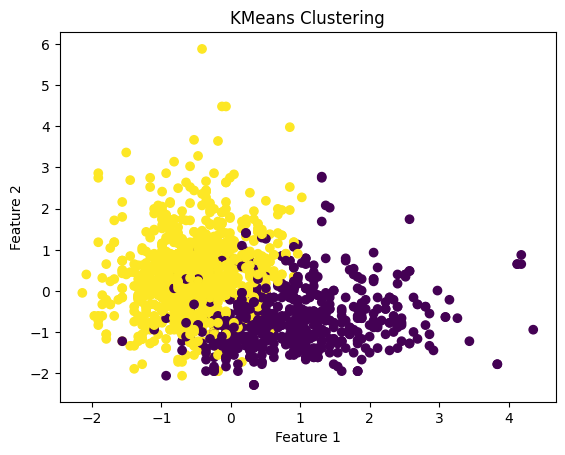

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Veri ön işleme: 'quality' sütunu hariç
X = red_wine.drop('quality', axis=1)
# Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# KMeans ile kümeleme
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Küme etiketleri
clusters = kmeans.labels_

# Küme sonuçlarını eklemek
red_wine['cluster'] = clusters

# Kümeleme sonuçlarını incelemek
print(red_wine['cluster'].value_counts())

# Küme merkezlerini görselleştirmek
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


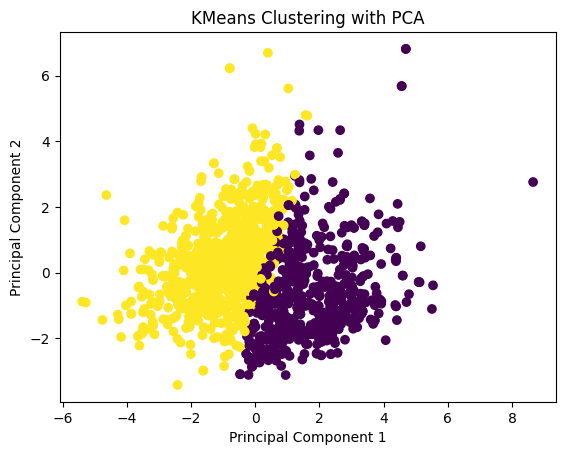

In [42]:
from sklearn.decomposition import PCA

# PCA ile boyut indirgeme (2 boyuta indir)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Kümeleri görselleştir
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [43]:
# Küme gruplarının ortalama değerlerini inceleme
cluster_analysis = red_wine.groupby('cluster').mean()
print(cluster_analysis)


         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             9.922712          0.413907     0.462881        2.765763   
1             7.382260          0.594430     0.158761        2.406095   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.099900            13.410169             39.388136  0.997689   
1         0.080196            17.316155             50.607532  0.996195   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.201847   0.748237  10.607401  0.664407  
1        3.375005   0.605471  10.315147  0.458870  


White Wine

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

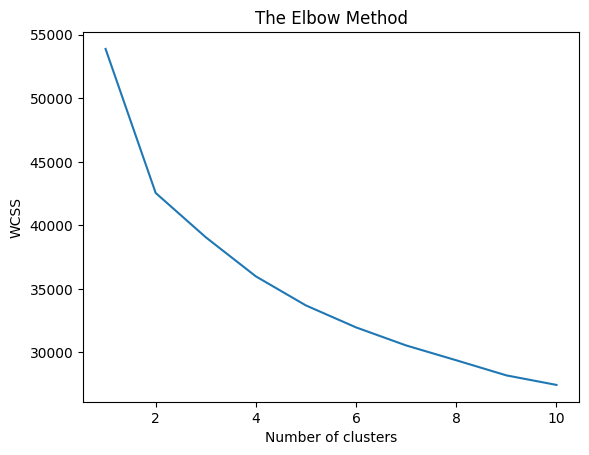

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    2941
0    1957
Name: count, dtype: int64


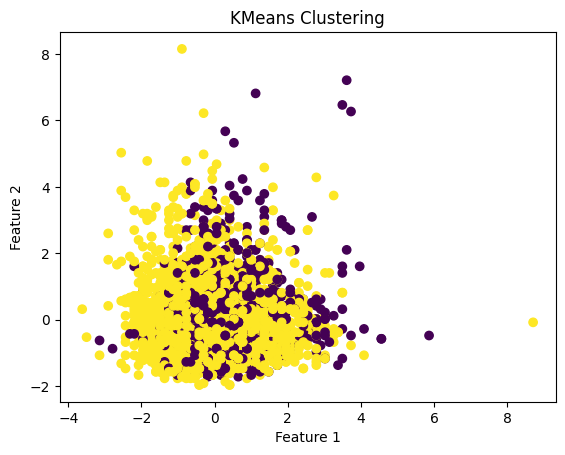

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Veri ön işleme: 'quality' sütunu hariç
X = white_wine.drop('quality', axis=1)
#Verileri standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Verileri standardize etme


# KMeans ile kümeleme
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Küme etiketleri
clusters = kmeans.labels_

# Küme sonuçlarını eklemek
white_wine['cluster'] = clusters

# Kümeleme sonuçlarını incelemek
print(white_wine['cluster'].value_counts())

# Küme merkezlerini görselleştirmek
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show();


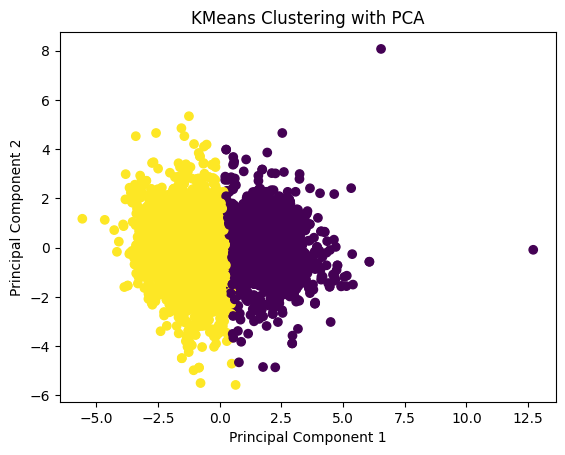

In [45]:
from sklearn.decomposition import PCA

# PCA ile boyut indirgeme (2 boyuta indir)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Kümeleri görselleştir
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [46]:
# Küme gruplarının ortalama değerlerini inceleme
cluster_analysis = white_wine.groupby('cluster').mean()
print(cluster_analysis)


         fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster                                                                 
0             7.003219          0.282966     0.362534       10.692131   
1             6.756018          0.275097     0.315332        3.529633   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster                                                                   
0         0.054475            45.464997            170.897547  0.996861   
1         0.039982            28.549473            116.709963  0.992142   

               pH  sulphates    alcohol   quality  
cluster                                            
0        3.157839   0.496679   9.541185  0.533470  
1        3.208514   0.485301  11.161775  0.752805  


# Hiearchical Cluster

Red Wine

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


cluster
0    1114
1     485
Name: count, dtype: int64


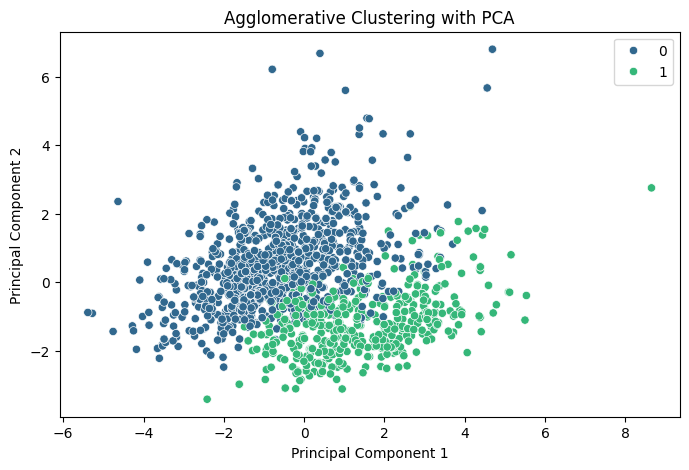

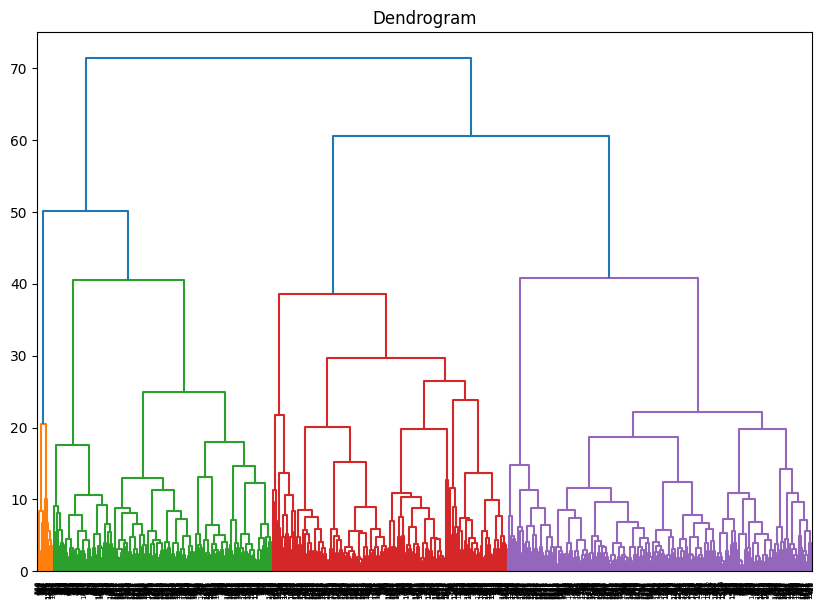

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

X = red_wine.drop('quality', axis=1)
# Veriyi standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hiyerarşik kümeleme (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = agg_cluster.fit_predict(X_scaled)

# Küme sonuçlarını eklemek
red_wine['cluster'] = clusters

# Kümeleme sonuçlarını incelemek
print(red_wine['cluster'].value_counts())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA ile kümeleri görselleştir
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Dendrogram ile hiyerarşik yapıyı görselleştirme
plt.figure(figsize=(10, 7))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.show()


White Wine

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


cluster
1    2933
0    1965
Name: count, dtype: int64


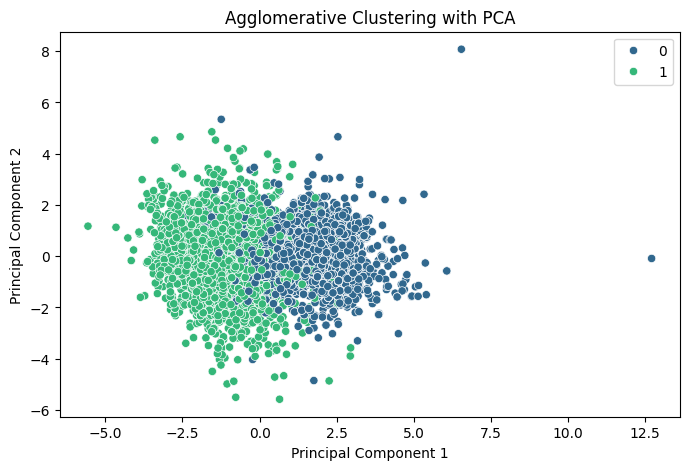

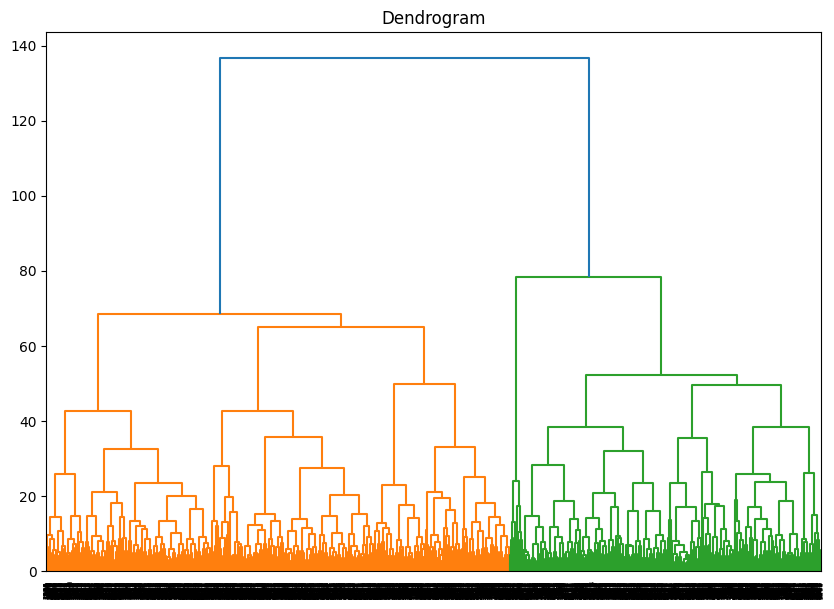

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

X = white_wine.drop('quality', axis=1)
# Veriyi standardize etme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hiyerarşik kümeleme (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = agg_cluster.fit_predict(X_scaled)

# Küme sonuçlarını eklemek
white_wine['cluster'] = clusters

# Kümeleme sonuçlarını incelemek
print(white_wine['cluster'].value_counts())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA ile kümeleri görselleştir
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Dendrogram ile hiyerarşik yapıyı görselleştirme
plt.figure(figsize=(10, 7))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.show()
